In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

# Arguments

In [2]:
corr = 0.25

# Load Meta-RL results

In [3]:

engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze"
env_name = f"cntree_layers7_bprob0.9_corr{corr}_state_dim10_envs300000_H800_explore"
if corr == 0.25:
    model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.2_initseed0_batch512"
elif corr == 0.:
    model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0_initseed4_batch512"
else:
    raise ValueError(f"Unknown correlation value: {corr}")
model_path = os.path.join(engram_dir, wandb_project, env_name, "models", model_name)
path_to_pkl = os.path.join(model_path, 'eval_results_offline_by_query_type.pkl')


In [4]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
metarl_df = pd.DataFrame(data)
metarl_df.head()

,model,return,environment,experienced_reward,context_length,query_type,path_length_scaled,returns_scaled
0,Opt,390.80,0,8,1000,seen_states_pre_reward,0.000051,0.999949
1,Learner (temp=2),338.75,0,8,1000,seen_states_pre_reward,0.133232,0.866768
2,Learner (temp=1),323.60,0,8,1000,seen_states_pre_reward,0.171997,0.828003
3,Learner (greedy),79.00,0,8,1000,seen_states_pre_reward,0.797861,0.202139
4,Opt,391.30,0,8,1000,seen_states_post_reward,-0.001229,1.001229


# Load DQN results

In [19]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "dqn_nlayers4_gamma0.9_target10_lr1e-05_temp0.01"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

In [20]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
dqn_df = pd.DataFrame(data)
dqn_df = dqn_df.rename(columns={'returns': 'return'})
dqn_df['model'] = 'DQN'
opt_return = 389.1792
dqn_df['path_length_scaled'] = (opt_return - dqn_df['return'])/opt_return
dqn_df['returns_scaled'] = dqn_df['return']/opt_return
dqn_df.head()

,return,environment,experienced_reward,context_length,query_type,model,path_length_scaled,returns_scaled
0,0.00,0,8,1000,seen_states_pre_reward,DQN,1.000000,0.000000
1,0.00,0,8,1000,seen_states_post_reward,DQN,1.000000,0.000000
2,0.00,0,8,1000,unseen_states,DQN,1.000000,0.000000
3,334.25,1,29,1000,seen_states_pre_reward,DQN,0.141141,0.858859
4,395.00,1,29,1000,seen_states_post_reward,DQN,-0.014957,1.014957


# Load Q table results

In [21]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "q_table_gamma0.85_temp0.01"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

In [22]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
qtable_df = pd.DataFrame(data)
qtable_df = qtable_df.rename(columns={'returns': 'return'})
qtable_df['model'] = 'Q Table'
opt_return = 389.1792
qtable_df['path_length_scaled'] = (opt_return - qtable_df['return'])/opt_return
qtable_df['returns_scaled'] = qtable_df['return']/opt_return
qtable_df.head()

,return,environment,experienced_reward,context_length,query_type,model,path_length_scaled,returns_scaled
0,390.85,0,8,1000,seen_states_pre_reward,Q Table,-0.004293,1.004293
1,391.75,0,8,1000,seen_states_post_reward,Q Table,-0.006606,1.006606
2,243.05,0,8,1000,unseen_states,Q Table,0.375480,0.624520
3,393.15,1,29,1000,seen_states_pre_reward,Q Table,-0.010203,1.010203
4,395.00,1,29,1000,seen_states_post_reward,Q Table,-0.014957,1.014957


# Plot all results

In [23]:
# Concatenate the dataframes
df = pd.concat([metarl_df, dqn_df, qtable_df], ignore_index=True)


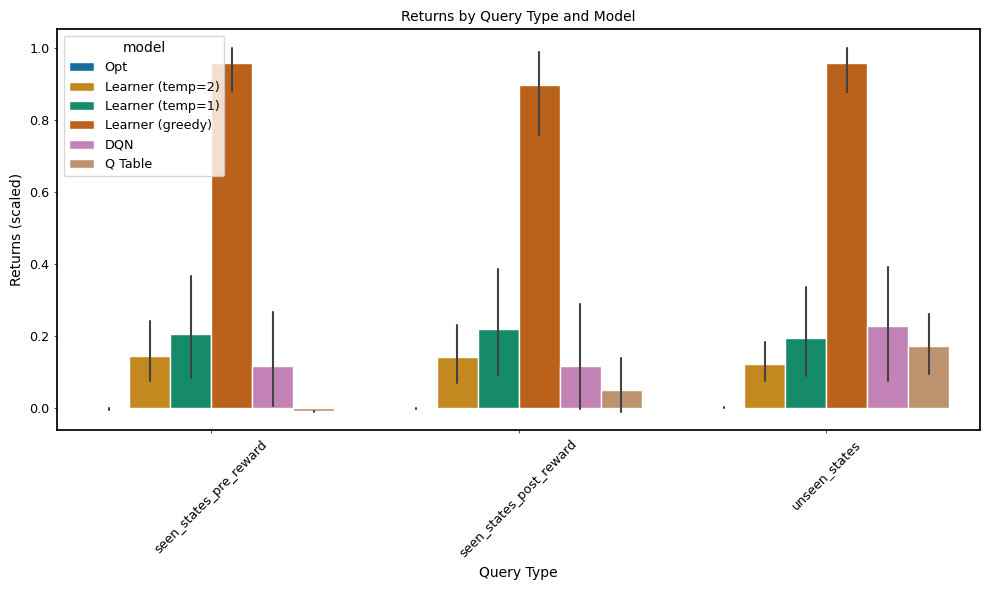

In [25]:
# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='query_type', y='path_length_scaled', hue='model')
plt.xticks(rotation=45)
plt.xlabel('Query Type')
plt.ylabel('Returns (scaled)')
plt.title('Returns by Query Type and Model')
plt.tight_layout()
plt.show()


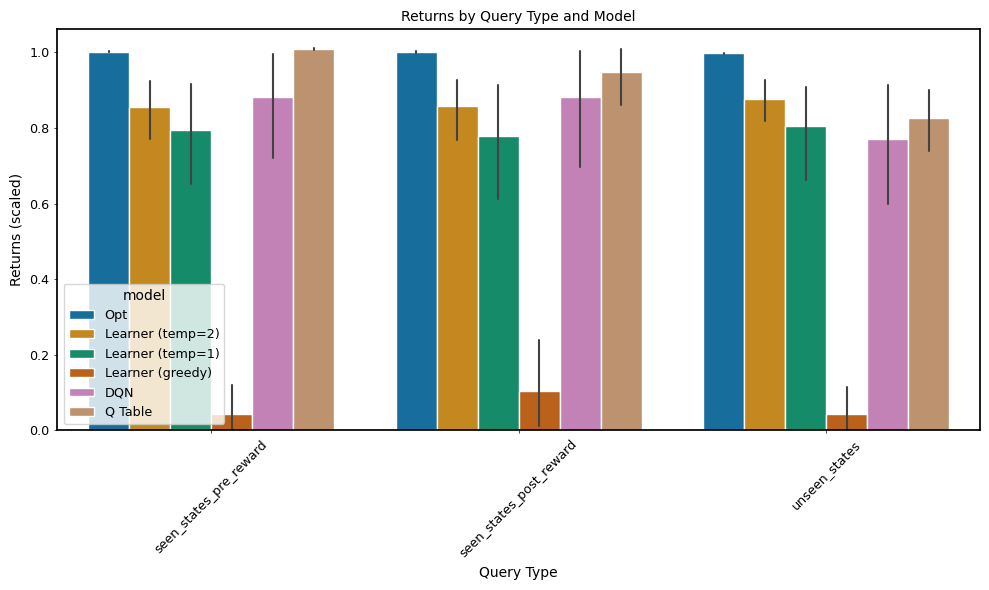

In [24]:
# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='query_type', y='returns_scaled', hue='model')
plt.xticks(rotation=45)
plt.xlabel('Query Type')
plt.ylabel('Returns (scaled)')
plt.title('Returns by Query Type and Model')
plt.tight_layout()
plt.show()


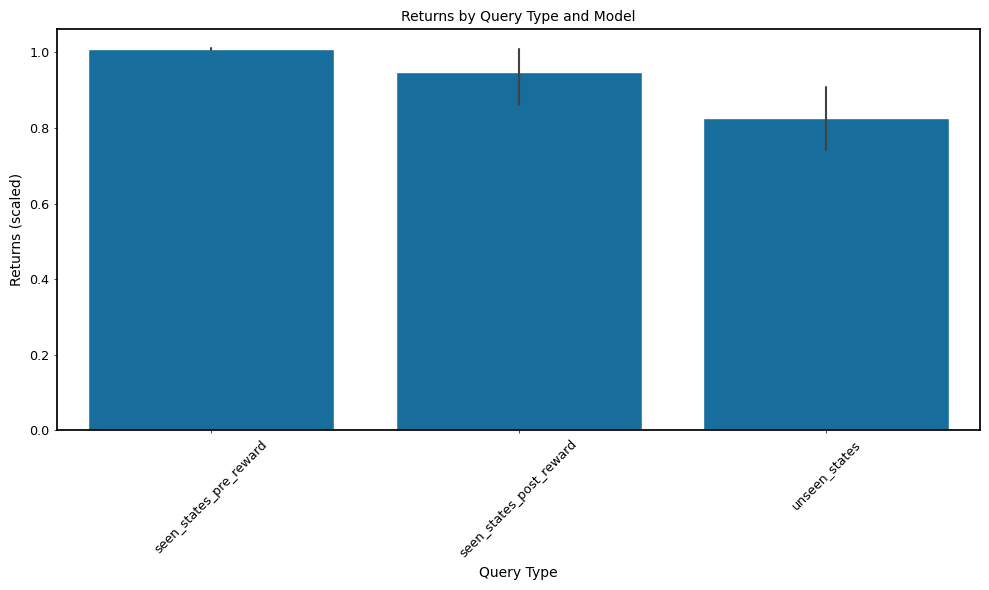

In [17]:
# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df[df['model'] == 'Q Table'], x='query_type', y='returns_scaled')
plt.xticks(rotation=45)
plt.xlabel('Query Type')
plt.ylabel('Returns (scaled)')
plt.title('Returns by Query Type and Model')
plt.tight_layout()
plt.show()

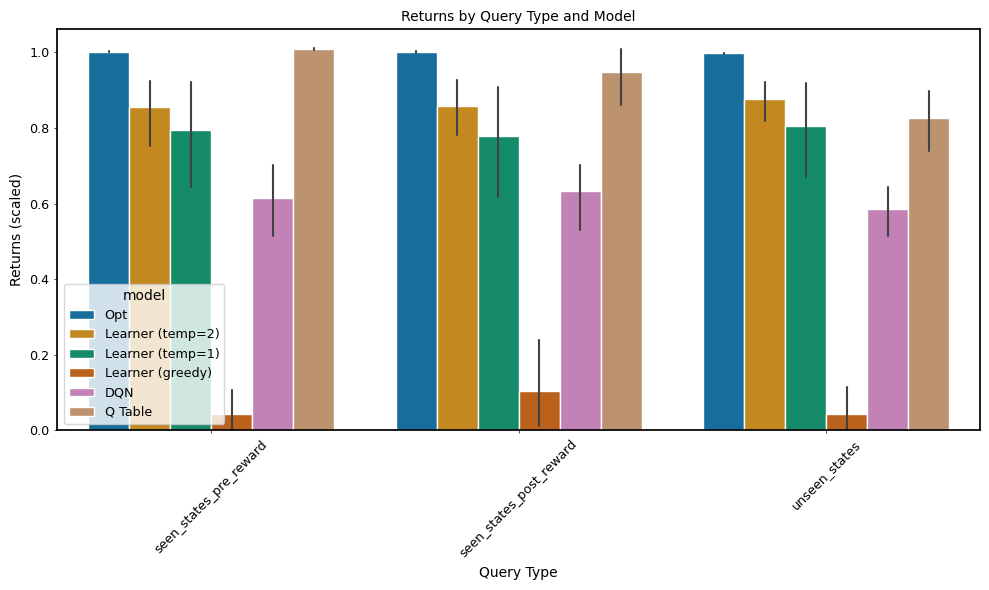

In [18]:
# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='query_type', y='returns_scaled', hue='model')
plt.xticks(rotation=45)
plt.xlabel('Query Type')
plt.ylabel('Returns (scaled)')
plt.title('Returns by Query Type and Model')
plt.tight_layout()
plt.show()
